<a href="https://colab.research.google.com/github/aasimasheikh-02/Deep-Learning/blob/main/flower_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" 
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'/root/.keras/datasets/flower_photos'

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
os.listdir(data_dir)

['sunflowers', 'tulips', 'dandelion', 'roses', 'LICENSE.txt', 'daisy']

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array,array_to_img
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [ ]:
data_dir.glob('*')

<generator object Path.glob at 0x7f6768a88b50>

In [ ]:
list(data_dir.glob('*'))

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy')]

In [ ]:
len(list(data_dir.glob('daisy/*')))

633

In [ ]:
roses = list(data_dir.glob('roses/*.jpg'))

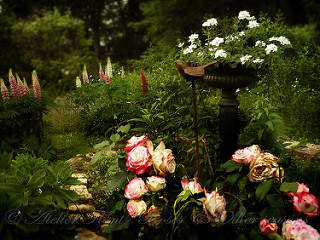

In [ ]:
PIL.Image.open(str(roses[621]))

In [ ]:
batch_size = 64
epochs = 50
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                     class_mode='sparse',
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [ ]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                 class_mode='sparse',
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [ ]:
sample_train_image,labels = next(train_data_gen)

In [ ]:
sample_train_image.shape

(64, 224, 224, 3)

In [ ]:
labels.shape


(64,)

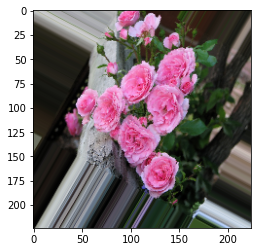

In [ ]:
plt.imshow(sample_train_image[10])

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout

In [ ]:
model = Sequential([
    Conv2D(20,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)), 
    MaxPooling2D(),
    Conv2D(40,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(80,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(5,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 20)      560       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 20)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 40)      7240      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 40)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 80)        28880     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 80)      

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen,epochs=epochs, validation_data=val_data_gen)

Epoch 1/50
46/46 [==============================] - 39s 849ms/step - loss: 1.9133 - accuracy: 0.3525 - val_loss: 1.2658 - val_accuracy: 0.4337
Epoch 2/50
46/46 [==============================] - 38s 819ms/step - loss: 1.1579 - accuracy: 0.5179 - val_loss: 1.2292 - val_accuracy: 0.5198
Epoch 3/50
46/46 [==============================] - 37s 799ms/step - loss: 1.0589 - accuracy: 0.5703 - val_loss: 1.0913 - val_accuracy: 0.5636
Epoch 4/50
46/46 [==============================] - 37s 800ms/step - loss: 0.9964 - accuracy: 0.5992 - val_loss: 0.9807 - val_accuracy: 0.6279
Epoch 5/50
46/46 [==============================] - 37s 794ms/step - loss: 0.9586 - accuracy: 0.6111 - val_loss: 0.9980 - val_accuracy: 0.6101
Epoch 6/50
46/46 [==============================] - 36s 792ms/step - loss: 0.9136 - accuracy: 0.6424 - val_loss: 1.0244 - val_accuracy: 0.5978
Epoch 7/50
46/46 [==============================] - 37s 795ms/step - loss: 0.8849 - accuracy: 0.6519 - val_loss: 1.0232 - val_accuracy: 0.6334

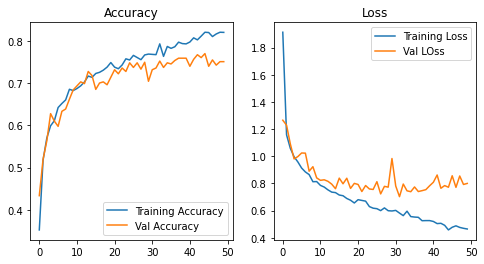

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()